## TD 1 
### Corally Ngov (2392143) et  Lina Sadat (2378349)

## Question 1 a)
### i)


In [ ]:
Fo = 40
h = 20

R = h / Fo
print(R)


0.5


### ii) $s/cm^2$

### iii)

In [61]:
from scipy.integrate import solve_ivp
def bilan_a(t, x, p, u):
    #Variable d'etat
    [h] = x
    #Parametres
    p = [A, R]
    #Eq. diff.
    dhdt = -h / (R * A)
    return dhdt

#Definir
A = 125
R = 0.5
Fo = 40
h = 0.5

#Conditions initiales
p = [A, R]
x0 = [h]
u0 = []
t_sim = [0, 500]

sim = solve_ivp(bilan_a, t_sim, x0, method = 'RK45', args = (p, u0), max_step = 0.01)
    

### iv)


### $ \frac{dh}{h} = -\frac{1}{RA}$
### $\int \frac{dh}{h} \, dx = \int -\frac{1}{RA}$
### $ln(h) = \frac{t}{RA} + C$
### $h = Ke^{-\frac{t}{RA}}$
### $h = h(0)e^{-\frac{t}{RA}}$

In [62]:
import numpy as np
h_anal = h * np.exp(-sim.t/(R * A))

### v)

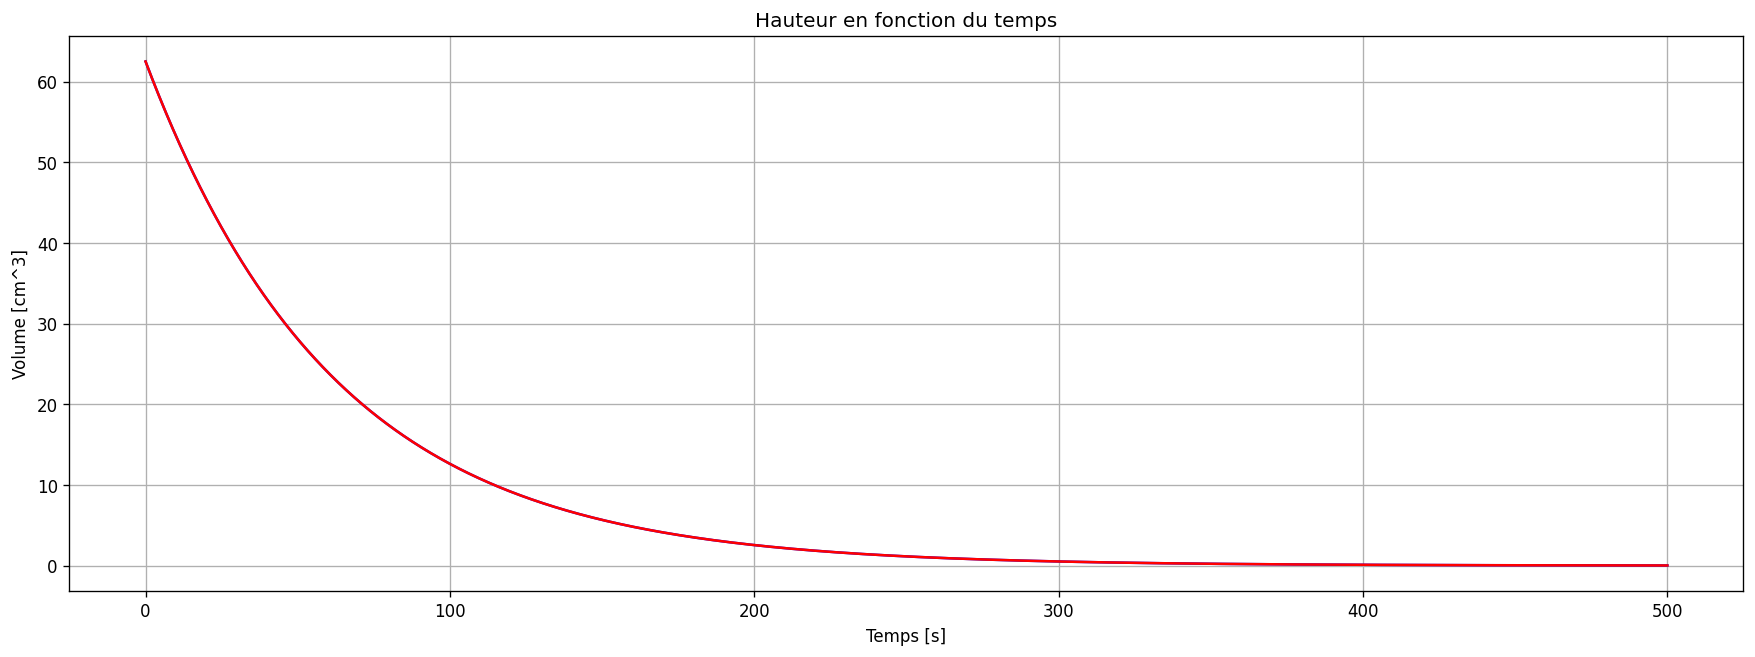

In [63]:
import  matplotlib.pyplot as plt

V_rk45= A * sim.y[0]
V_anal = A * h_anal

plt.figure(figsize=(18, 6), dpi = 120)
plt.plot(sim.t, V_anal, 'b-')
plt.plot(sim.t,V_rk45, 'r-' )
plt.xlabel('Temps [s]')
plt.ylabel('Volume [cm^3]')
plt.title('Hauteur en fonction du temps')
plt.grid()
plt.show()

## Question 2


### i)


In [64]:
def bilans_GrandsLacs(t, x, p, u):
   #Assignation variable d'etat
   [C2, C3, C6, C8, C10] = x
   #Assignation parametres
   [V1, V2, V3, V4, V5, F1, F2, F3, F4, F5, F6, F7, F8, F9, F10] = p
   #Eq. diff
   dC2 = (F1 / V1) * (C1 - C2)
   dC3 = (1 / V2) * (F4 * C4 - F3 * C3)
   dC6 = (1 / V3) * (F2 * C2 + F3 * C3 + F5 * C5 - F6 * C6)
   dC8 = (1 / V4) * (F6 * C6 + F7 * C7 - F8 * C8)
   dC10 = (1 / V5) * (F8 * C8 + F9 * C9 - F10 * C10)

   return [dC2, dC3, dC6, dC8, dC10]

#Definir
C1 = 10
[C4, C5, C7, C9] = [0, 0, 0, 0]

#Conditions initiales
x0 = [0, 0, 0, 0, 0]
p = [2900, 1180, 850, 116, 393, 15, 15, 38, 38, 15, 68, 17, 85, 14, 99]
t_sim = [0, 500]
u0 = []

sim = solve_ivp(bilans_GrandsLacs, t_sim, x0, method = 'RK45', args = (p, u0), max_step = 0.01)




### ii)

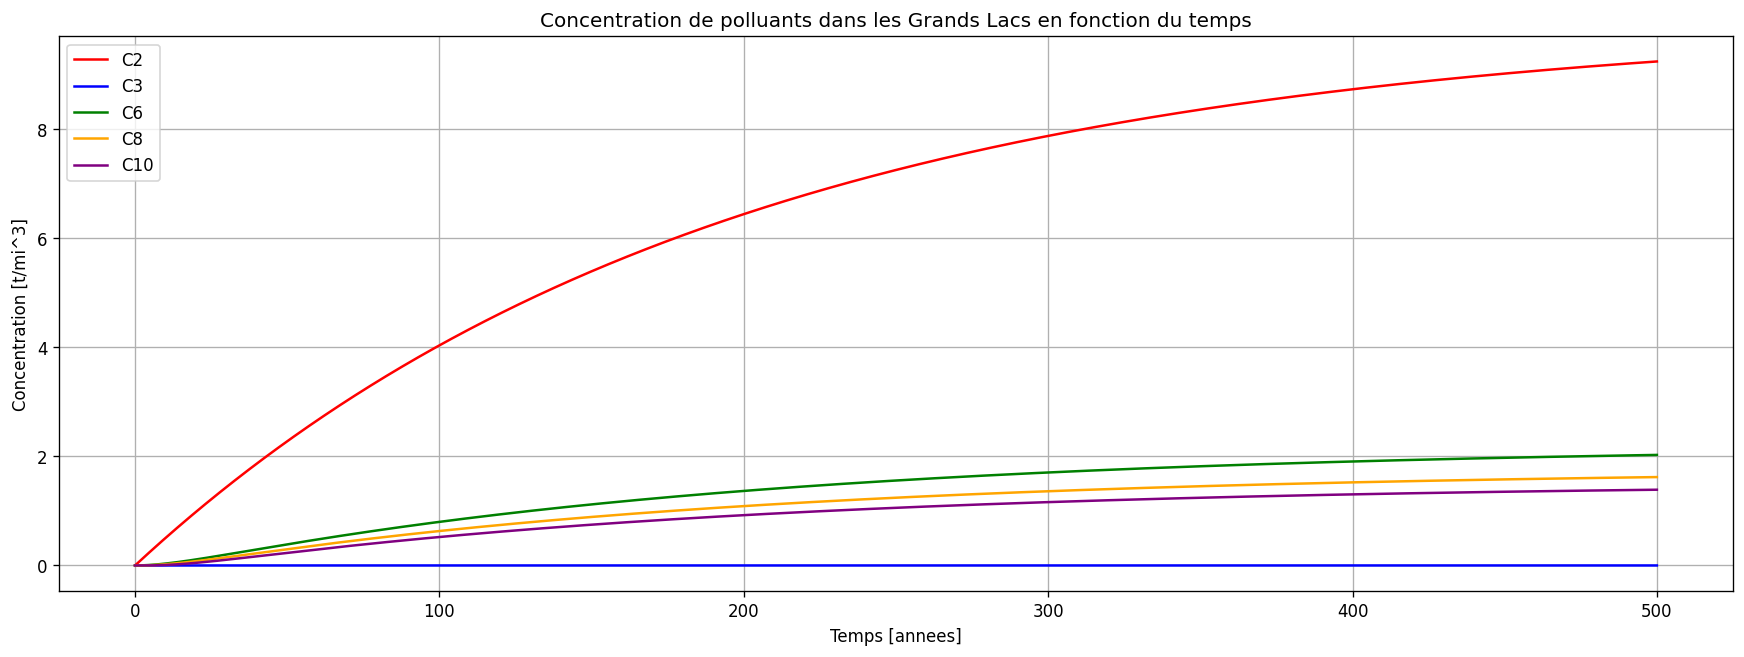

In [65]:
C2 = sim.y[0]
C3 = sim.y[1]
C6 = sim.y[2]
C8 = sim.y[3]
C10 = sim.y[4]

plt.figure(figsize=(18, 6), dpi=120)
plt.plot(sim.t, C2, label = 'C2', color = 'red')
plt.plot(sim.t, C3, label = 'C3', color = 'blue')
plt.plot(sim.t, C6, label = 'C6', color = 'green')
plt.plot(sim.t, C8, label = 'C8', color = 'orange')
plt.plot(sim.t, C10, label = 'C10', color = 'purple')
plt.xlabel('Temps [annees]')
plt.ylabel('Concentration [t/mi^3]')
plt.title('Concentration de polluants dans les Grands Lacs en fonction du temps')
plt.grid()
plt.legend()
plt.show()

### iii)


In [66]:
C_final = sim.y[:, -1]
C = ['C2', 'C3', 'C6', 'C8','C10']
for i in range(len(C_final)):
    print(f"{C[i]} = {C_final[i]:.4f} t/mi^3")

C2 = 9.2469 t/mi^3
C3 = 0.0000 t/mi^3
C6 = 2.0283 t/mi^3
C8 = 1.6216 t/mi^3
C10 = 1.3897 t/mi^3


##### La concentration C2 est la plus élevée ce qui fait du sens car son affluent est dirrectement lié au Lac Supérieur qui contient le polluant. La concentration C3 est nulle car son affluent n'est pas lié au Lac Supérieur. Ensuite, de C6 à C10, il est normal que la quantité de polluants diminue car on s'éloigne de la source.

### iv)

In [67]:
tau = V1 / F1
print(f"{tau:.2f} ans")

    

193.33 ans


In [72]:
F1 = 15      
V1 = 2900    
C1 = 10      

def C2_analytique(t):
    return C1 * (1 - np.exp(-t / tau))

C2_vals = C2_analytique(t)
for k in range(1, 6):
    kt = k * tau
    C2_t = C2_analytique(kt)
    delta_C2 = (C2_t / C1) * 100
    print(f"{k}\t {kt:.2f} ans\t {delta_C2:.2f}%")

1	 193.33 ans	 63.21%
2	 386.67 ans	 86.47%
3	 580.00 ans	 95.02%
4	 773.33 ans	 98.17%
5	 966.67 ans	 99.33%


##### Il est possible de voir que la concentration C2 augmente exponentiellement. Elle s'approche de la concentration en régime permanent sans l'atteindre.